1. What i want to know?

In [1]:
# Top words
# Vocabulary
# words per song 

2. Data Aggregation - how to aggregate?

In [62]:
# for every artist, select the column

3. Visualisation 

In [3]:
# Word Clouds of vocabulary, bar plots for songs

In [4]:
# !pip install wordcloud
import pandas as pd
from wordcloud import WordCloud
%matplotlib inline

data=pd.read_pickle('dtm.pkl')
data=data.transpose()  #aggregations feel easier, because only one column
# data.head()

In [17]:
# find the top 50 words of each band
top_dict={}
for artist in data.columns:   # for every artist, look in the df
    top=data[artist].sort_values(ascending=False).head(50)
    top_dict[artist]=list(zip(top.index,top.values))
# top_dict

In [6]:
for artist,top_words in top_dict.items():    #These are first 15 Top words of each artist
    print(artist)
    print(' ,  '.join([word for word, count in top_words[0:14]]))
    print('----')

Blind Guardian
time ,  come ,  know ,  end ,  life ,  ba ,  fear ,  leave ,  feel ,  dark ,  hear ,  ill ,  dream ,  away
----
Iron Maiden
oh ,  know ,  time ,  man ,  life ,  come ,  fear ,  let ,  live ,  feel ,  run ,  look ,  away ,  tell
----
Queen
love ,  yeah ,  oh ,  know ,  time ,  ooh ,  let ,  come ,  hey ,  want ,  baby ,  life ,  man ,  like
----
Flogging Molly
day ,  man ,  like ,  ill ,  leave ,  life ,  know ,  come ,  way ,  little ,  old ,  time ,  say ,  love
----
Manowar
fight ,  ride ,  blood ,  hail ,  metal ,  die ,  world ,  wind ,  kill ,  know ,  power ,  live ,  king ,  come
----


# Notes:
## Oh, oooh,  etc --> Maybe stop words?
## Sort by genre for finding patterns

# Wordcloud

In [18]:
word=pd.read_pickle('corpus.pkl')
word.index.rename("artist",inplace = True)

wc=WordCloud (background_color="white",colormap="Dark2", max_font_size=150,random_state=42)

In [8]:
import matplotlib.pyplot as plt

c_manowar =WordCloud(max_font_size=50, max_words=100, colormap="Dark2", background_color="white").generate(word.Lyrics['Manowar'])


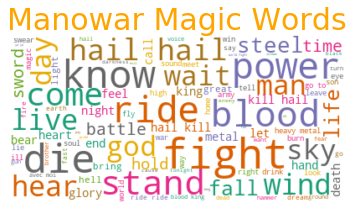

In [9]:
plt.imshow(c_manowar, interpolation='bilinear')
plt.axis("off")  #takes out axis
plt.title('Manowar Magic Words',  size= 30, color='orange')
plt.show()


# Vocabulary

In [10]:
# Unique Words

In [11]:
# non-zeros in the matrix
unique_words=[]
for artist in data.columns:
    uniques=data[artist].to_numpy().nonzero()[0].size    #nonzero is execluded in pandas since 0.24
    unique_words.append(uniques)

In [12]:
words=pd.DataFrame (list(zip(artists,unique_words)),columns=['Artist','Unique Words'])

In [13]:
words.set_index('Artist').sort_values('Unique Words', ascending = False)

,Unique Words
Artist,
Iron Maiden,3098
Queen,2904
Blind Guardian,1782
Flogging Molly,1475
Manowar,1455


In [14]:
import os
songs_per_artist=[]
for artist in artists:
    DIR = f'./data/{artist}'
    songs=len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
    songs_per_artist.append(songs)
  

In [60]:

word['count']=word['Lyrics'].str.split().apply(len).value_counts()

In [55]:
word['Songs']=songs_per_artist